In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import os
import matplotlib.ticker as ticker
import dateparser

In [2]:
comments_path = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\03_Data_Labelization\\Data", "comments_final_labels.csv") 

df_comments = pd.read_csv(comments_path)

df_comments.head()

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1,Yorum Uzunluğu,Yorum_V2,savasy_label,...,joeddav_label,joeddav_skor,kaixkhazaki_label,kaixkhazaki_skor,MoritzLaurer_label,MoritzLaurer_skor,ZeroShot_label,ZeroShot_skor,final_label,final_skor
0,17 Şubat 2025,168cm,55,S,"Çok güzel 1.68 ,55 kilo s beden tam oldu",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,"Çok güzel 1.68 ,55 kilo s beden tam oldu",40,"çok güzel 1.68 ,55 kilo s beden tam oldu",olumlu,...,olumlu,0.997684,olumlu,0.930659,olumlu,0.984298,olumlu,0.970880,olumlu,0.959417
1,14 Şubat 2025,165cm,59,S,Boyum 1.65 bi tik daha uzun olsa elbise iyi ol...,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,Boyum 1.65 bir tık daha uzun olsa elbise iyi o...,135,boyum 1.65 bir tık daha uzun olsa elbise iyi o...,olumsuz,...,olumlu,0.936270,olumlu,0.857906,olumsuz,-0.775901,olumlu,0.339425,olumlu,0.250283
2,23 Aralık 2024,168cm,60,S,1.68 boy 60 kilo s beden cuk oturdu. Wow değil...,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,1.68 boy 60 kilo s beden cuk oturdu. Wow değil...,203,1.68 boy 60 kilo s beden cuk oturdu. wow değil...,olumsuz,...,olumlu,0.990739,olumlu,0.886708,olumlu,0.897199,olumlu,0.924882,olumlu,0.924882
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,"çok beğendim, kumaşı farklı ve gerçekten çok şık",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,"çok beğendim, kumaşı farklı ve gerçekten çok şık",48,"çok beğendim, kumaşı farklı ve gerçekten çok şık",olumlu,...,olumlu,0.993717,olumlu,0.956035,olumlu,0.985931,olumlu,0.978561,olumlu,0.959421
4,01 Şubat 2025,157cm,46,S,Xs uzun süredir gelmediği için s aldım 157*46 ...,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,Xs uzun süredir gelmediği için s aldım 157*46 ...,140,xs uzun süredir gelmediği için s aldım 157*46 ...,olumsuz,...,olumsuz,-0.631333,olumlu,0.595040,olumsuz,-0.520216,olumsuz,-0.185503,olumsuz,-0.144843


In [ ]:
null_tarih_sayisi = df_comments['Tarih'].isnull().sum()
print(f"'Tarih' sütunundaki null değer sayısı: {null_tarih_sayisi}")

'Tarih' sütunundaki null değer sayısı: 9


In [ ]:
null_tarih_satirlari = df_comments[df_comments['Tarih'].isnull()]
null_tarih_satirlari

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1,Yorum Uzunluğu,Yorum_V2,savasy_label,...,joeddav_label,joeddav_skor,kaixkhazaki_label,kaixkhazaki_skor,MoritzLaurer_label,MoritzLaurer_skor,ZeroShot_label,ZeroShot_skor,final_label,final_skor
18419,NaN,168cm,80,42,Çok beğendim kızlar çok esnek alabilir siniz g...,TRENDYOLMİLLA Kahverengi Vücuda Oturan Örme Kı...,Çok beğendim kızlar çok esnek alabilir siniz g...,53,çok beğendim kızlar çok esnek alabilir siniz g...,olumlu,...,olumlu,0.998758,olumlu,0.930710,olumlu,0.987542,olumlu,0.972337,olumlu,0.871098
36413,NaN,Bilgi mevcut değil,Bilgi mevcut değil,'Bilgi mevcut değil,Yorum yok,TRENDYOLMİLLA Lacivert Çizgili Vücudu Saran Mi...,Yorum yok,9,yorum yok,olumsuz,...,olumsuz,-0.510746,olumsuz,-0.567633,olumsuz,-0.663156,olumsuz,-0.580512,olumsuz,-0.580512
36414,NaN,'Bilgi mevcut değil,'Bilgi mevcut değil,40,İnditex kalitesinde cok yapısmasın diye L aldı...,TRENDYOLMİLLA Lacivert Çizgili Vücudu Saran Mi...,İnditex kalitesinde çok yapısmasın diye L aldı...,72,i̇nditex kalitesinde çok yapısmasın diye l ald...,olumsuz,...,olumlu,0.985783,olumlu,0.854023,olumlu,0.927944,olumlu,0.922583,olumlu,0.486778
39085,NaN,'Bilgi mevcut değil,'Bilgi mevcut değil,36,çok güzel ama iç gösteriyor,TRENDYOLMİLLA Siyah Vücuda Oturan V Yaka Dokum...,çok güzel ama iç gösteriyor,27,çok güzel ama iç gösteriyor,olumsuz,...,olumlu,0.981114,olumlu,0.950445,olumlu,0.940071,olumlu,0.957210,olumlu,0.957210
64072,NaN,'Bilgi mevcut değil,'Bilgi mevcut değil,M,mükemmel bir ürün inanılmaz şık ve kaliteli du...,TRENDYOLMİLLA Siyah Soyut Baskılı Tül Biye Det...,mükemmel bir ürün inanılmaz şık ve kaliteli du...,115,mükemmel bir ürün inanılmaz şık ve kaliteli du...,olumlu,...,olumlu,0.996720,olumlu,0.859237,olumlu,0.990848,olumlu,0.948935,olumlu,0.972214
72908,NaN,Bilgi mevcut değil,Bilgi mevcut değil,40,kalıbı asssssiri dar kol kısımları patlayacak ...,TRENDYOLMİLLA Mürdüm Vücuda Oturan Arkası Ayar...,kalıbı asssssiri dar kol kısımları patlayacak ...,147,kalıbı asssssiri dar kol kısımları patlayacak ...,olumsuz,...,olumlu,0.984603,olumlu,0.678261,olumlu,0.752290,olumlu,0.805051,olumlu,0.446072
82602,NaN,'Bilgi mevcut değil,55,34,Mükemmel alın aldırın ❤️,TRENDYOLMİLLA Vizon Çizgili Triko Garnili Düz ...,Mükemmel alın aldırın,22,mükemmel alın aldırın,olumlu,...,olumlu,0.998011,olumlu,0.836442,olumlu,0.886320,olumlu,0.906924,olumlu,0.950500
82603,NaN,Bilgi mevcut değil,Bilgi mevcut değil,36,çok güzel gönül rahatliyla ala bilirsiniz,TRENDYOLMİLLA Vizon Çizgili Triko Garnili Düz ...,çok güzel gönül rahatliyla ala bilirsiniz,41,çok güzel gönül rahatliyla ala bilirsiniz,olumlu,...,olumlu,0.993726,olumlu,0.905786,olumlu,0.985498,olumlu,0.961670,olumlu,0.974766
96538,NaN,Bilgi mevcut değil,Bilgi mevcut değil,2XL,iade ettim kilolu bayanlar için uygun degil gö...,Trendyol Curve Zümrüt Yeşili Fitilli Gömlek Ya...,iade ettim kilolu bayanlar için uygun degil gö...,60,iade ettim kilolu bayanlar için uygun degil gö...,olumsuz,...,olumsuz,-0.930607,olumsuz,-0.689085,olumsuz,-0.963206,olumsuz,-0.860966,olumsuz,-0.505914


In [ ]:
df_comments = df_comments.dropna(subset=['Tarih'])

df_comments = df_comments.reset_index(drop=True)

In [6]:
df_comments = df_comments[df_comments["Tarih"] != "Fenomen"]
df_comments.head()

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1,Yorum Uzunluğu,Yorum_V2,savasy_label,...,joeddav_label,joeddav_skor,kaixkhazaki_label,kaixkhazaki_skor,MoritzLaurer_label,MoritzLaurer_skor,ZeroShot_label,ZeroShot_skor,final_label,final_skor
0,17 Şubat 2025,168cm,55,S,"Çok güzel 1.68 ,55 kilo s beden tam oldu",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,"Çok güzel 1.68 ,55 kilo s beden tam oldu",40,"çok güzel 1.68 ,55 kilo s beden tam oldu",olumlu,...,olumlu,0.997684,olumlu,0.930659,olumlu,0.984298,olumlu,0.970880,olumlu,0.959417
1,14 Şubat 2025,165cm,59,S,Boyum 1.65 bi tik daha uzun olsa elbise iyi ol...,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,Boyum 1.65 bir tık daha uzun olsa elbise iyi o...,135,boyum 1.65 bir tık daha uzun olsa elbise iyi o...,olumsuz,...,olumlu,0.936270,olumlu,0.857906,olumsuz,-0.775901,olumlu,0.339425,olumlu,0.250283
2,23 Aralık 2024,168cm,60,S,1.68 boy 60 kilo s beden cuk oturdu. Wow değil...,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,1.68 boy 60 kilo s beden cuk oturdu. Wow değil...,203,1.68 boy 60 kilo s beden cuk oturdu. wow değil...,olumsuz,...,olumlu,0.990739,olumlu,0.886708,olumlu,0.897199,olumlu,0.924882,olumlu,0.924882
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,"çok beğendim, kumaşı farklı ve gerçekten çok şık",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,"çok beğendim, kumaşı farklı ve gerçekten çok şık",48,"çok beğendim, kumaşı farklı ve gerçekten çok şık",olumlu,...,olumlu,0.993717,olumlu,0.956035,olumlu,0.985931,olumlu,0.978561,olumlu,0.959421
4,01 Şubat 2025,157cm,46,S,Xs uzun süredir gelmediği için s aldım 157*46 ...,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,Xs uzun süredir gelmediği için s aldım 157*46 ...,140,xs uzun süredir gelmediği için s aldım 157*46 ...,olumsuz,...,olumsuz,-0.631333,olumlu,0.595040,olumsuz,-0.520216,olumsuz,-0.185503,olumsuz,-0.144843


In [7]:
urun_sayilari = df_comments['Ürün Adı'].value_counts()
urun_sayilari_df = urun_sayilari.reset_index()
urun_sayilari_df.columns = ['Ürün Adı', 'Adet']
urun_sayilari_df.head()

,Ürün Adı,Adet
0,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka ...,885
1,TRENDYOLMİLLA Siyah Vücuda Oturan Mini Dik Yak...,712
2,TRENDYOLMİLLA Siyah Fitted/ Vücuda Oturan Kols...,706
3,TRENDYOLMİLLA Lacivert Vücuda Oturan Degaje Ya...,540
4,TRENDYOLMİLLA Siyah Fitilli Kare Yaka Vücuda O...,504


In [ ]:
df_comments.columns = df_comments.columns.str.strip()

df_comments['Tarih_New'] = df_comments['Tarih'].apply(
    lambda x: dateparser.parse(x, languages=['tr']) if pd.notnull(x) else None
)

df_comments['Tarih_New'] = df_comments['Tarih_New'].apply(
    lambda x: x.replace(tzinfo=None) if x is not None else None
)

urun_ozet = df_comments.groupby('Ürün Adı').agg(
    Adet=('Ürün Adı', 'count'),
    min_date=('Tarih_New', 'min'),
    max_date=('Tarih_New', 'max')
).reset_index()

urun_ozet

,Ürün Adı,Adet,min_date,max_date
0,Edit by Trendyol Bordo Bordo Elbise Fitted Örm...,10,2024-10-25,2025-03-06
1,Edit by Trendyol Kahverengi Vücuda Oturan Örme...,23,2024-12-04,2025-03-05
2,Edit by Trendyol Kırmızı Vücuda Oturan Asimetr...,14,2024-08-23,2025-03-05
3,Edit by Trendyol Mavi Çiçekli Midi Dokuma Elbi...,2,2025-02-24,2025-03-08
4,Edit by Trendyol Saks Vücuda Oturan Asimetrik ...,6,2025-02-13,2025-03-01
...,...,...,...,...
1525,Trendyol Curve Çok Renkli Çiçekli Ayarlanabili...,1,2025-03-08,2025-03-08
1526,Trendyol Curve Çok Renkli Çiçekli Kruvaze V Ya...,16,2024-11-06,2025-03-10
1527,Trendyol Curve Çok Renkli Çiçekli Poplin %100 ...,1,2025-03-10,2025-03-10
1528,Trendyol Curve Çok Renkli- Kırmızı Tropik Yapr...,2,2025-01-24,2025-03-10


In [ ]:
urun_ozet_sorted = urun_ozet.sort_values(by='Adet', ascending=False)

urun_ozet_sorted

,Ürün Adı,Adet,min_date,max_date
995,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka ...,885,2022-03-22,2025-02-17
1016,TRENDYOLMİLLA Siyah Vücuda Oturan Mini Dik Yak...,712,2022-03-21,2025-03-10
844,TRENDYOLMİLLA Siyah Fitted/ Vücuda Oturan Kols...,706,2022-03-24,2025-03-07
465,TRENDYOLMİLLA Lacivert Vücuda Oturan Degaje Ya...,540,2022-03-13,2025-02-27
842,TRENDYOLMİLLA Siyah Fitilli Kare Yaka Vücuda O...,504,2022-04-15,2025-03-10
...,...,...,...,...
836,TRENDYOLMİLLA Siyah Eteği Belden Açılan Tek Om...,1,2025-02-15,2025-02-15
825,TRENDYOLMİLLA Siyah Ekose / Kareli A Kesim Aks...,1,2025-03-01,2025-03-01
823,TRENDYOLMİLLA Siyah Düğmeli Kolsuz Midi Dokuma...,1,2025-03-05,2025-03-05
43,TRENDYOLMİLLA Açık Yağ Yeşili Mini Dokuma Bağl...,1,2025-03-06,2025-03-06


In [ ]:
urun_ozet_sorted['date_diff'] = (urun_ozet_sorted['max_date'] - urun_ozet_sorted['min_date']).dt.days
urun_ozet_sorted.head(1000)

,Ürün Adı,Adet,min_date,max_date,date_diff
995,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka ...,885,2022-03-22,2025-02-17,1063
1016,TRENDYOLMİLLA Siyah Vücuda Oturan Mini Dik Yak...,712,2022-03-21,2025-03-10,1085
844,TRENDYOLMİLLA Siyah Fitted/ Vücuda Oturan Kols...,706,2022-03-24,2025-03-07,1079
465,TRENDYOLMİLLA Lacivert Vücuda Oturan Degaje Ya...,540,2022-03-13,2025-02-27,1082
842,TRENDYOLMİLLA Siyah Fitilli Kare Yaka Vücuda O...,504,2022-04-15,2025-03-10,1060
...,...,...,...,...,...
445,TRENDYOLMİLLA Lacivert Kuşaklı Çiçekli A Kesim...,14,2024-10-04,2025-03-01,148
809,TRENDYOLMİLLA Siyah Düz Maxi Örme Elbise TWOAW...,14,2024-10-03,2025-02-28,148
851,TRENDYOLMİLLA Siyah Fitted/Vücuda Oturan Mini ...,14,2024-11-22,2025-02-25,95
39,TRENDYOLMİLLA Açık Mavi Kemerli Ceket Yaka Max...,14,2024-03-11,2025-01-18,313


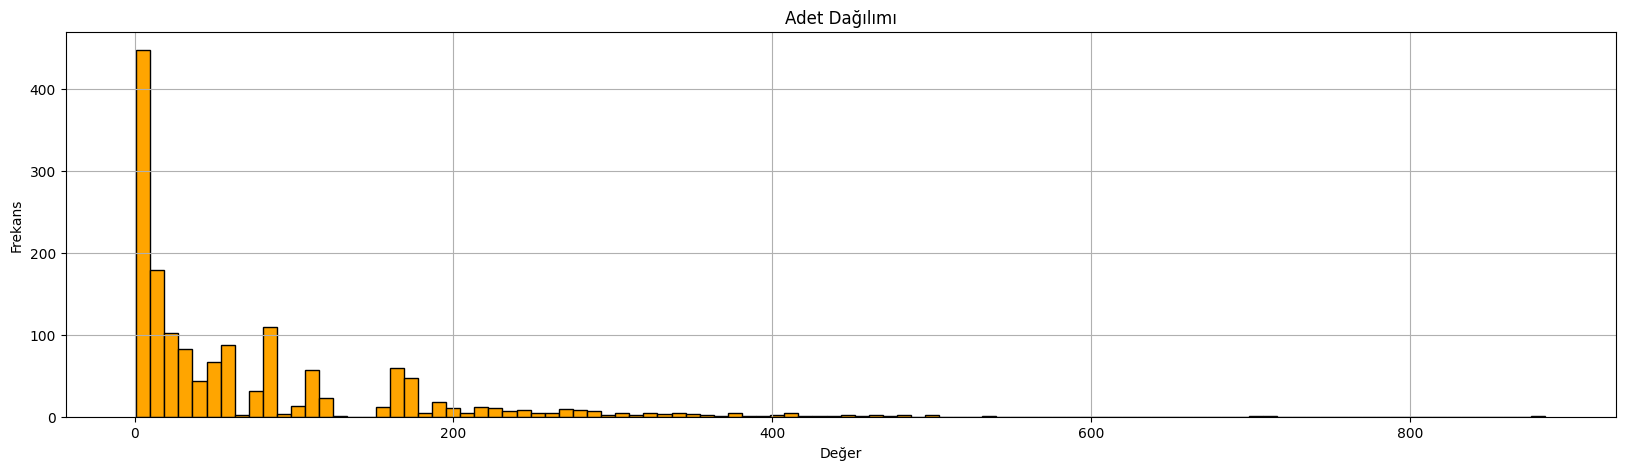

In [18]:
plt.figure(figsize=(20, 5))
plt.hist(urun_ozet_sorted["Adet"], bins=100, color='orange', edgecolor='black')
plt.title("Adet Dağılımı")
plt.xlabel("Değer")
plt.ylabel("Frekans")
plt.grid(True)
plt.show()

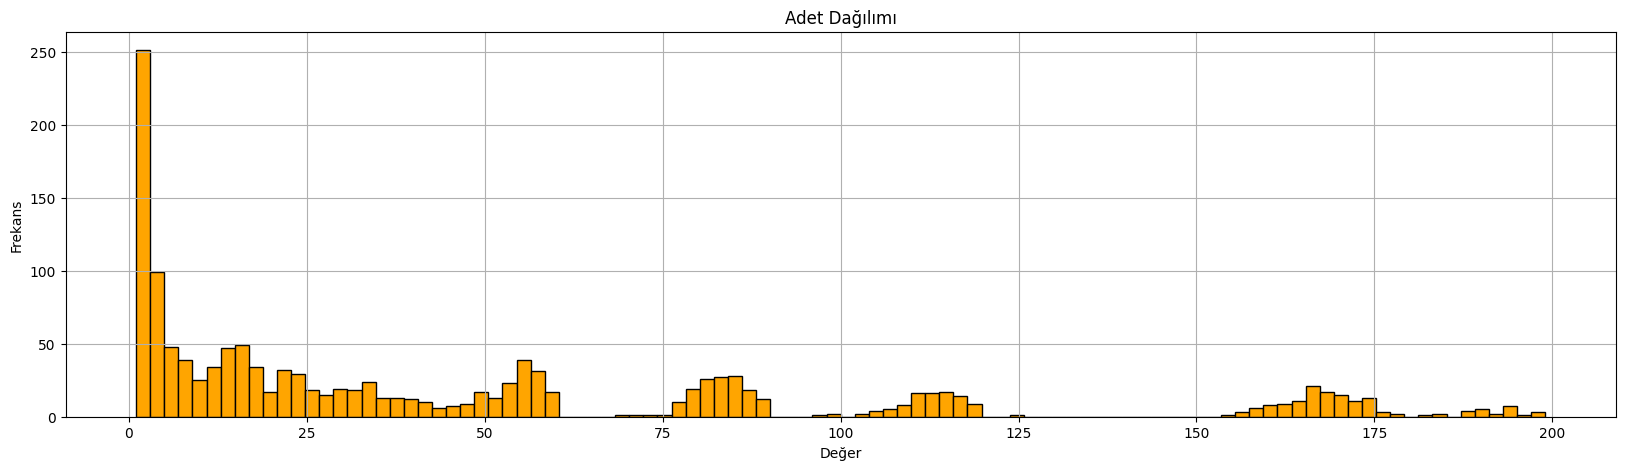

In [20]:
df = urun_ozet_sorted[urun_ozet_sorted["Adet"] < 200]

plt.figure(figsize=(20, 5))
plt.hist(df["Adet"], bins=100, color='orange', edgecolor='black')
plt.title("Adet Dağılımı")
plt.xlabel("Değer")
plt.ylabel("Frekans")
plt.grid(True)
plt.show()

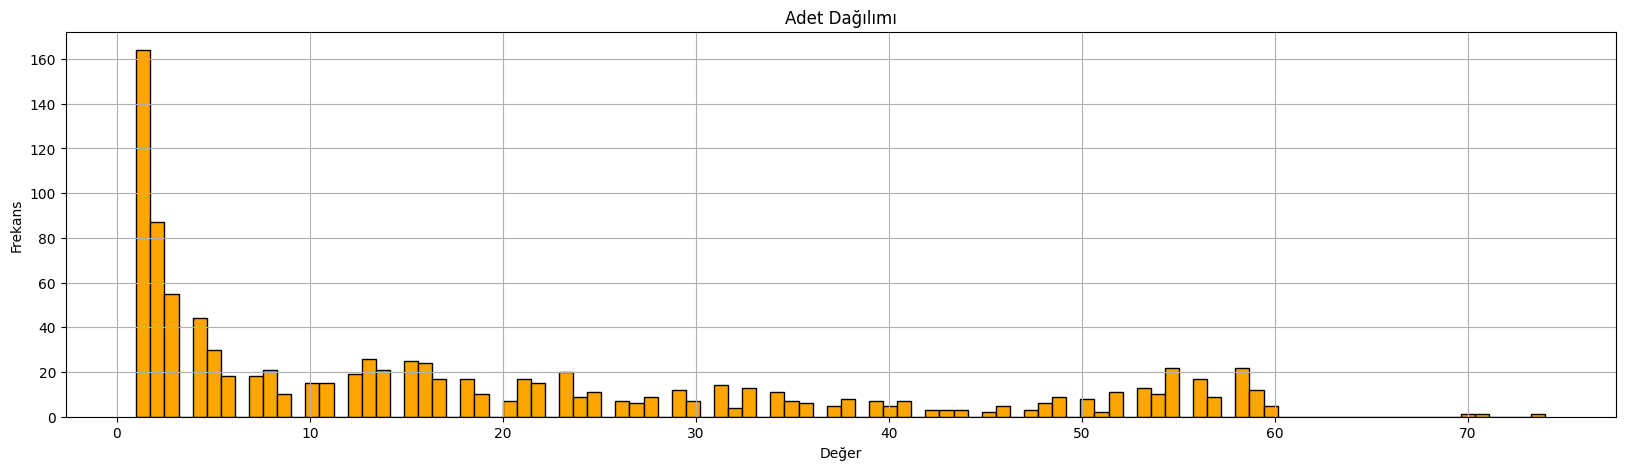

In [22]:
df = urun_ozet_sorted[urun_ozet_sorted["Adet"] < 75]

plt.figure(figsize=(20, 5))
plt.hist(df["Adet"], bins=100, color='orange', edgecolor='black')
plt.title("Adet Dağılımı")
plt.xlabel("Değer")
plt.ylabel("Frekans")
plt.grid(True)
plt.show()

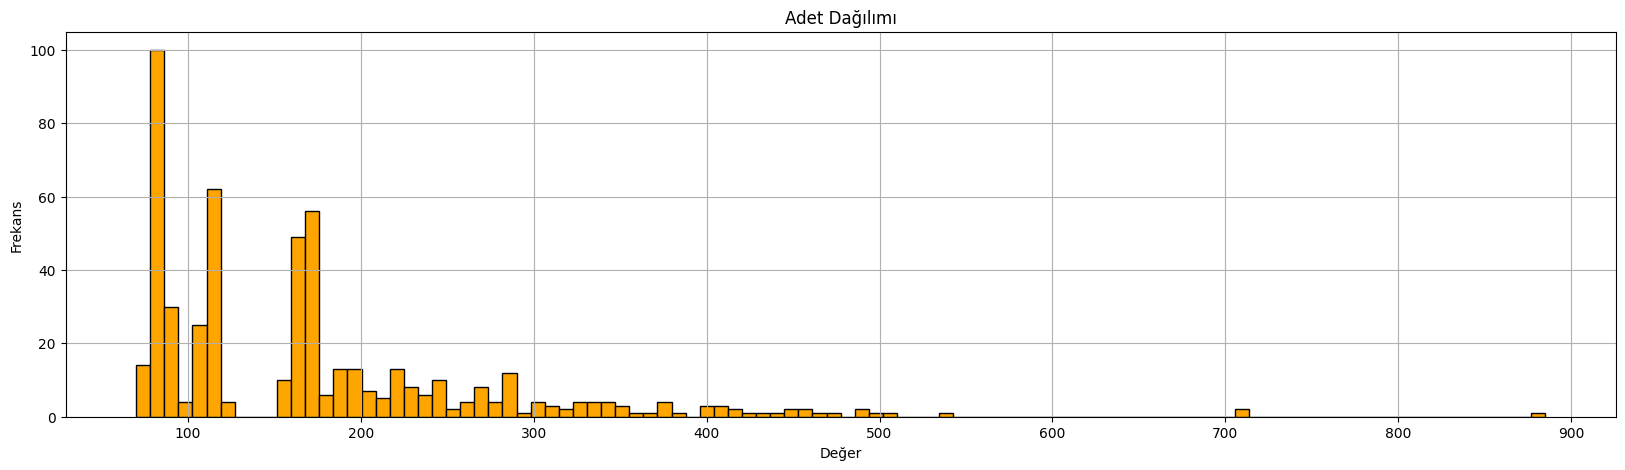

In [23]:
df = urun_ozet_sorted[urun_ozet_sorted["Adet"] > 60 ]

plt.figure(figsize=(20, 5))
plt.hist(df["Adet"], bins=100, color='orange', edgecolor='black')
plt.title("Adet Dağılımı")
plt.xlabel("Değer")
plt.ylabel("Frekans")
plt.grid(True)
plt.show()

In [30]:
urun_ozet_sorted = urun_ozet_sorted[urun_ozet_sorted["Adet"] > 60]
urun_ozet_sorted.head()

,Ürün Adı,Adet,min_date,max_date,date_diff
995,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka ...,885,2022-03-22,2025-02-17,1063
1016,TRENDYOLMİLLA Siyah Vücuda Oturan Mini Dik Yak...,712,2022-03-21,2025-03-10,1085
844,TRENDYOLMİLLA Siyah Fitted/ Vücuda Oturan Kols...,706,2022-03-24,2025-03-07,1079
465,TRENDYOLMİLLA Lacivert Vücuda Oturan Degaje Ya...,540,2022-03-13,2025-02-27,1082
842,TRENDYOLMİLLA Siyah Fitilli Kare Yaka Vücuda O...,504,2022-04-15,2025-03-10,1060


In [ ]:
label_counts = df_comments.groupby(['Ürün Adı', 'final_label']).size().unstack(fill_value=0)

label_counts = label_counts.rename(columns={
    'olumlu': 'olumlu_sayi',
    'olumsuz': 'olumsuz_sayi'
})

urun_ozet_sorted = urun_ozet_sorted.merge(label_counts, on='Ürün Adı', how='left')

urun_ozet_sorted[['olumlu_sayi', 'olumsuz_sayi']] = urun_ozet_sorted[['olumlu_sayi', 'olumsuz_sayi']].fillna(0).astype(int)

urun_ozet_sorted.head()

,Ürün Adı,Adet,min_date,max_date,date_diff,olumlu_sayi,olumsuz_sayi
0,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka ...,885,2022-03-22,2025-02-17,1063,802,83
1,TRENDYOLMİLLA Siyah Vücuda Oturan Mini Dik Yak...,712,2022-03-21,2025-03-10,1085,614,98
2,TRENDYOLMİLLA Siyah Fitted/ Vücuda Oturan Kols...,706,2022-03-24,2025-03-07,1079,667,39
3,TRENDYOLMİLLA Lacivert Vücuda Oturan Degaje Ya...,540,2022-03-13,2025-02-27,1082,518,22
4,TRENDYOLMİLLA Siyah Fitilli Kare Yaka Vücuda O...,504,2022-04-15,2025-03-10,1060,451,53


In [ ]:
comment_path = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\04_Data_Time_Series\\Data")
file_name = "products_times_and_labels.csv"
file_path = os.path.join(comment_path, file_name)
urun_ozet_sorted.to_csv(file_path, index=False)  
print(f"{file_name} olarak kaydedildi.") 

products_times_and_labels.csv olarak kaydedildi.
